In [61]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

print(city_data.count())
print(ride_data.head())

# Combine the data into a single dataset
city_ride = pd.merge(city_data, ride_data, on="city")

# Display the data table for preview
city_ride.head()

city            120
driver_count    120
type            120
dtype: int64
                 city                 date   fare        ride_id
0  Lake Jonathanshire  2018-01-14 10:14:22  13.83  5739410935873
1  South Michelleport  2018-03-04 18:24:09  30.24  2343912425577
2  Port Samanthamouth  2018-02-24 04:29:00  33.44  2005065760003
3          Rodneyfort  2018-02-10 23:22:03  23.44  5149245426178
4          South Jack  2018-03-06 04:28:35  34.58  3908451377344


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [71]:
city_ride['type'].value_counts()

Urban       1625
Suburban     625
Rural        125
Name: type, dtype: int64

## Bubble Plot of Ride Sharing Data

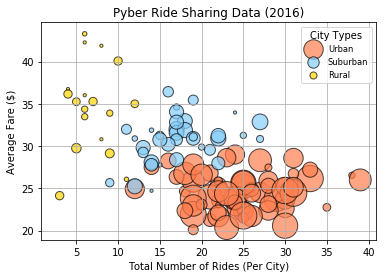

In [170]:
# Obtain the x and y coordinates for each of the three city types

urban = city_ride.loc[city_ride['type']=='Urban', :].groupby(['type', 'city'])
suburban = city_ride.loc[city_ride['type']=='Suburban', :].groupby(['type', 'city'])
rural = city_ride.loc[city_ride['type'] == 'Rural', :].groupby(['type', 'city'])

city_types = [urban, suburban, rural]
colors = ['coral', 'lightskyblue', 'gold']
labels = ['Urban', 'Suburban', 'Rural']

for i in range(0, 3):
    
    x = city_types[i]["ride_id"].count()
    y = city_types[i]['fare'].mean()
    size = city_types[i]['driver_count'].mean()
    plt.scatter(x, y, s=size*10, marker="o", facecolors=colors[i], alpha = 0.7, edgecolors='black', linewidth=1, label=labels[i])
    
#-------------------------------------------------------
#ride_urban = urban["ride_id"].count()
#avefare_urban = urban['fare'].mean()
#driver_urban = urban['driver_count'].mean()

#ride_suburban = 


#Colors = ['lightcoral', 'Suburban', 'lightskyblue']

#driver_count_city = grouped['driver_count'].mean()
#all_types = pd.merge(pd.DataFrame(ride_count_city), pd.DataFrame(ave_fare_city), on=['type', 'city'])

#for type in city_types:
    
 #   plt.scatter(urban_total_rides, urban_average_fare, marker="o", facecolors="red", 
  #              s=urban_total_drivers*10, alpha = 0.5, label = "Urban")
#urban scatter
#plt.scatter(rural_total_rides, rural_average_fare, marker="o", facecolors="orange", 
 #           s=rural_total_drivers*20, alpha = 0.5, label = "Rural")

#urban scatter
#plt.scatter(suburban_total_rides, suburban_average_fare, marker="o", facecolors="blue", 
 #           s=rural_total_drivers*20, alpha = 0.5, label = "Suburban")

#print(df_color)

#colors = grouped['color'].unique()

#print(colors)
#print(driver_count_city)

#df.groupby('c')['type'].value_counts().reset_index(name='t')

#colors = grouped.reset_index(name='color')
#print(colors)

#color = [str(item/255.) for item in y]


#plt.scatter(ride_count_city, ave_fare_city, s=driver_count_city*8, norm=colors, alpha=0.7, edgecolors='black', linewidth=1)
#-------------------------------------------

#Legend and chart description
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Incorporate the other graph properties
plt.grid()

# Create a legend
plt.legend(title="City Types", loc = 'upper right', fontsize='small')

# Incorporate a text label regarding circle size
#plt.annotate('Circle size correlates with driver count per city', xy=(1.05, 1.0), xytext=(1.05, 0.8),
            #arrowprops=dict(facecolor='black', shrink=0.05))

# Save Figure
plt.savefig('../Images/Pyber.png')

In [144]:
# Show plot
plt.show()

## Total Fares by City Type

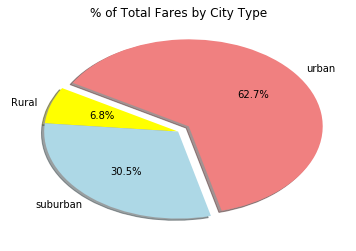

<Figure size 432x288 with 0 Axes>

In [218]:
# Calculate Type Percents

#print(all_types)
total_fare = city_ride.groupby('type')['fare'].sum()


# Build Pie Chart

labels = ["Rural","suburban", "urban"]
colors = ["yellow","lightblue","lightcoral"]
explode = (0, 0, 0.1)

plt.pie(total_fare, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=150, radius=1)

#plt.axis("equal")
plt.title("% of Total Fares by City Type")

plt.show()

# Save Figure
plt.savefig("../images/fare_percentage.png")


In [217]:
# Show Figure
plt.show()

## Total Rides by City Type

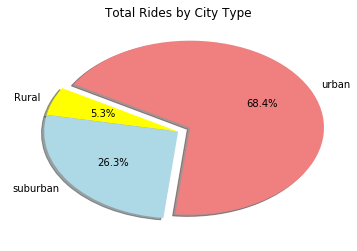

<Figure size 432x288 with 0 Axes>

In [207]:
# Calculate Ride Percents

#print(all_types.count())
total_ride = city_ride.groupby('type')['ride_id'].count()

# Build Pie Chart
labels = ["Rural","suburban", "urban"]
colors = ["yellow","lightblue","lightcoral"]
explode = (0, 0, 0.1)

plt.pie(total_ride, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=150, radius=1)

plt.title("% of Total Rides by City Type")

plt.show()

# Save Figure
plt.savefig("../images/rides_percentage.png")


In [208]:
# Show Figure
plt.show()

## Total Drivers by City Type

         type                  city  driver_count
0       Rural          Bradshawfurt             7
1       Rural             Garzaport             7
2       Rural        Harringtonfort             4
3       Rural           Jessicaport             1
4       Rural            Lake Jamie             4
5       Rural       Lake Latoyabury             2
6       Rural           Michaelberg             6
7       Rural          New Ryantown             2
8       Rural            Newtonview             1
9       Rural           North Holly             8
10      Rural           North Jaime             1
11      Rural           Penaborough             6
12      Rural        Randallchester             9
13      Rural        South Jennifer             7
14      Rural     South Marychester             1
15      Rural       South Saramouth             7
16      Rural           Taylorhaven             1
17      Rural          West Heather             4
18   Suburban         Barronchester            11


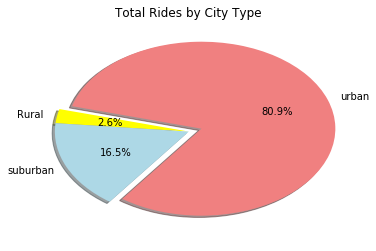

<Figure size 432x288 with 0 Axes>

In [216]:
# Calculate Driver Percents
#all_types = city_ride.groupby('type')
#print(all_types.count())
total_driver_city = city_ride.groupby(['type','city'])['driver_count'].mean()
total_driver_city = pd.DataFrame(total_driver_city).reset_index()
total_driver = total_driver_city.groupby(['type'])['driver_count'].sum()

#print(total_driver_c)

# Build Pie Chart
labels = ["Rural","suburban", "urban"]
colors = ["yellow","lightblue","lightcoral"]
explode = (0, 0, 0.1)

plt.pie(total_driver, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=165, radius=1)

plt.title("% of Total Drivers by City Type")

plt.show()

# Save Figure
plt.savefig("../images/driver_percentage.png")


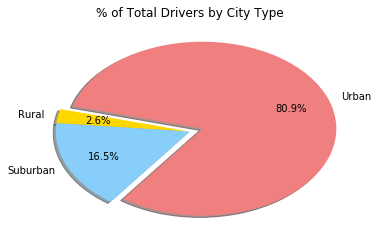

In [6]:
# Show Figure
plt.show()